## Gráficas de los datos

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mainpath = "../datasets/" #carpeta global
filename = "customer-churn-model/Customer Churn Model.txt" #dataset
fullpath = os.path.join(mainpath, filename)
data = pd.read_csv (fullpath)

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/customer-churn-model/Customer Churn Model.txt'

In [3]:
data.columns.values 

array(['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan",
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls',
       'Intl Charge', 'CustServ Calls', 'Churn?'], dtype=object)

## Gráficas de dispersión

<AxesSubplot: xlabel='Day Mins', ylabel='Day Charge'>

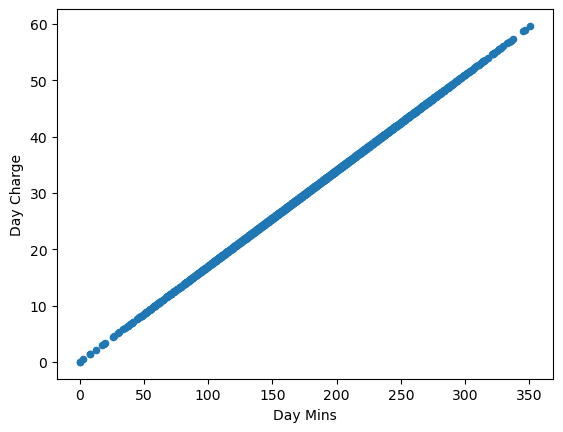

In [4]:
data.plot(kind="scatter",x="Day Mins",y="Day Charge") #kind=tipo de grafica

<AxesSubplot: xlabel='Night Mins', ylabel='Night Charge'>

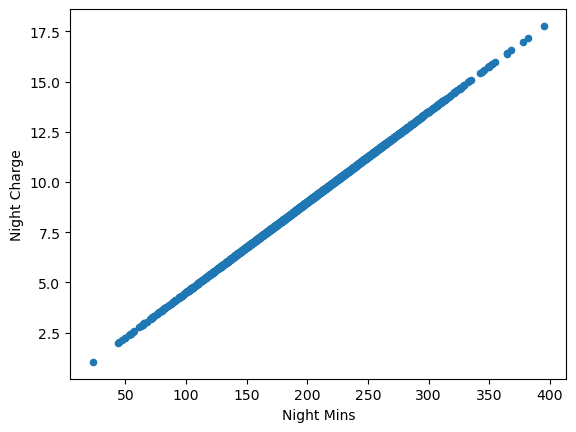

In [5]:
data.plot(kind="scatter",x="Night Mins",y="Night Charge") #kind=tipo de grafica

<AxesSubplot: xlabel='Night Calls', ylabel='Night Charge'>

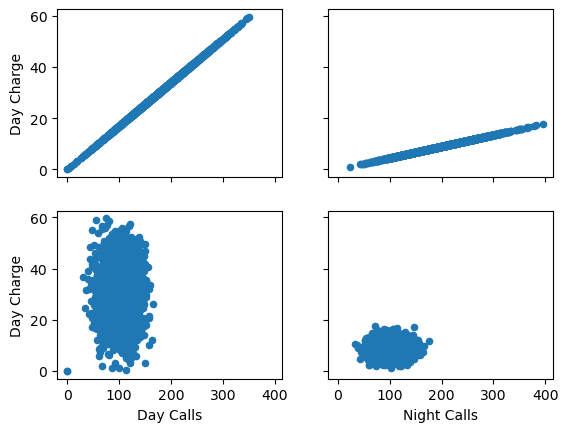

In [6]:
figure, axs = plt.subplots(2,2, sharey=True, sharex=True) #libreria matplotlib
# matriz de 2,2 que comparten los ejes  x y y 
data.plot(kind="scatter", x="Day Mins", y ="Day Charge", ax=axs[0][0]) #ax posición en la matriz
data.plot(kind="scatter", x="Night Mins", y="Night Charge", ax=axs[0][1])
data.plot(kind="scatter", x="Day Calls", y ="Day Charge", ax=axs[1][0])
data.plot(kind="scatter", x="Night Calls", y="Night Charge", ax=axs[1][1])

## Histogramas de frecuencias

Text(0.5, 1.0, 'Histograma del número de llamadas al día')

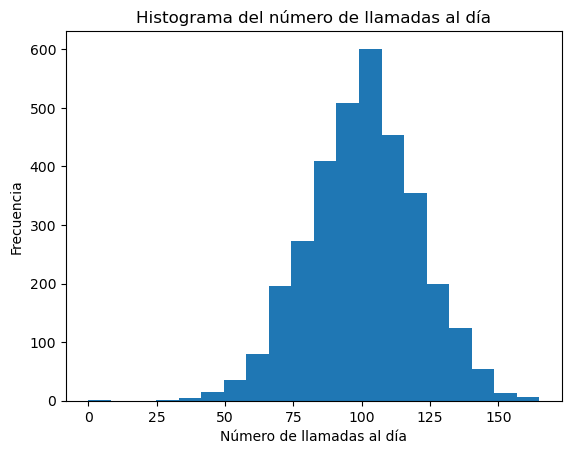

In [7]:
plt.hist(data["Day Calls"],bins=20) # bins=10 default
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma del número de llamadas al día")

Text(0.5, 1.0, 'Histograma del número de llamadas al día')

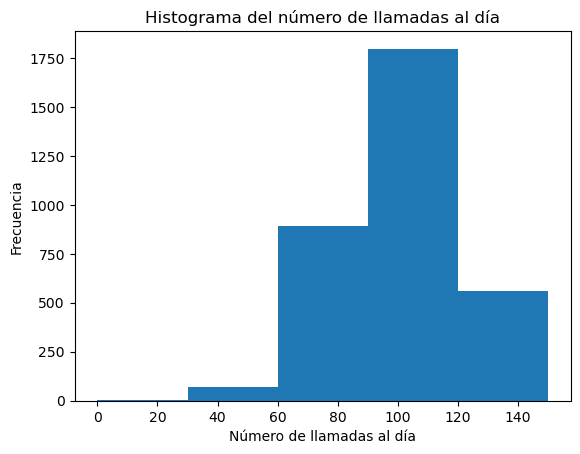

In [8]:
plt.hist(data["Day Calls"],bins= [0,30,60,90,120,150]) #divisiones especificas
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma del número de llamadas al día")

## Regla de Sturges

Número de divisiones de un histograma

https://es.wikipedia.org/wiki/Regla_de_Sturges

In [14]:
k = int(np.ceil(1+np.log2(len(data)))) #regla de sturges con un numero entero
k

13

Text(0.5, 1.0, 'Histograma del número de llamadas al día')

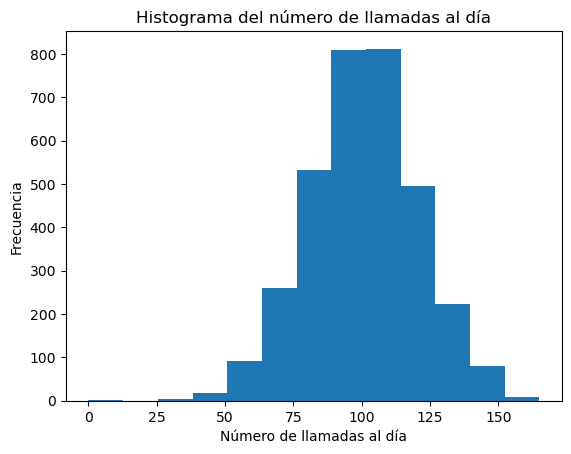

In [16]:
plt.hist(data["Day Calls"], bins = k) 
plt.xlabel("Número de llamadas al día")
plt.ylabel("Frecuencia")
plt.title("Histograma del número de llamadas al día")

## Boxplot

Text(0.5, 1.0, 'Boxplot de las llamadas diarias')

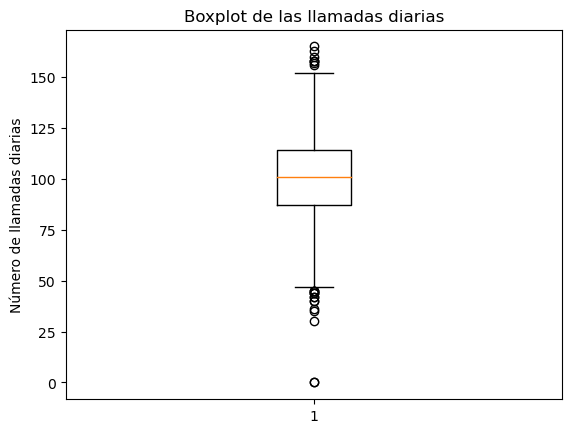

In [17]:
plt.boxplot(data["Day Calls"])
plt.ylabel("Número de llamadas diarias")
plt.title("Boxplot de las llamadas diarias")

In [96]:
data["Day Calls"].describe()
# La caja son los datos entre 25, 50 y 75 %
# Los valores fuera son los círculos

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [19]:
# resta entre el primer y tercer cuartil es el IQR = rango intercuatilico (114-87=27)
IQR=data["Day Calls"].quantile(0.75)-data["Day Calls"].quantile(0.25)
IQR

27.0

In [20]:
# Las barras llegan a 1.5 de IQR 
data["Day Calls"].quantile(0.25) - 1.5*IQR #inferior

46.5

In [21]:
# Las barras llegan a 1.5 de IQR 
data["Day Calls"].quantile(0.25) + 1.5*IQR #superior

127.5